# Import Libraries

In [12]:
from pathlib import Path
import csv
import pandas as pd

# Read CSV 

In [13]:
fedpath = Path("fed_covid.csv")

In [14]:
fed_csv = pd.read_csv(fedpath)

# Set date as index
fed_csv = fed_csv.set_index(fed_csv['date'])
fed_csv = fed_csv.drop(columns = ['date'])
fed_csv.sample(2)

,headline,release,url,text
date,,,,
15-Mar-20,Federal Reserve issues FOMC statement,Press Release,https://www.federalreserve.gov/newsevents/pres...,The coronavirus outbreak has harmed communitie...
23-Apr-20,Federal Reserve Board outlines the extensive a...,Press Release,https://www.federalreserve.gov/newsevents/pres...,Building on its strong record of transparency ...


# VADER SENTIMENT

In [15]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

get_ipython().run_line_magic("matplotlib", "inline")

In [16]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
fed_csv_num = fed_csv.reset_index()
fed_csv_num.head(2)

,date,headline,release,url,text
0,1-Jul-20,Agencies provide largest firms with informatio...,Joint Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Deposit Insurance Corporation and ...
1,29-Jun-20,Federal Reserve Board releases new term sheet ...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday released a...


In [18]:
# Calculate sentiment based on compound score
def get_sentiment(score):
    # Neutral by default
    result = 0 
    # Positive 
    if score >= 0.99:
        result = 1 
    return result

In [19]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

In [20]:
# Get sentiment for the text and the title
for index, row in fed_csv_num.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["headline"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
fed_csv_num = fed_csv_num.join(title_sentiment_df).join(text_sentiment_df)

fed_csv_num.head()


,date,headline,release,url,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,1-Jul-20,Agencies provide largest firms with informatio...,Joint Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Deposit Insurance Corporation and ...,0.0000,0.000,1.000,0.000,0,-0.9186,0.020,0.897,0.083,0
1,29-Jun-20,Federal Reserve Board releases new term sheet ...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday released a...,0.3818,0.126,0.874,0.000,0,0.9733,0.217,0.762,0.020,0
2,25-Jun-20,Federal Reserve Board releases results of stre...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Thursday released...,-0.4215,0.000,0.877,0.123,0,-0.9398,0.057,0.852,0.092,0
3,15-Jun-20,Federal Reserve Board announces it will be see...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday announced ...,0.5994,0.164,0.836,0.000,0,0.9887,0.120,0.856,0.024,0
4,15-Jun-20,Federal Reserve Board announces updates to Sec...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday announced ...,0.7845,0.198,0.802,0.000,0,0.9720,0.160,0.840,0.000,0


In [22]:
compound_df = fed_csv_num.set_index('date')

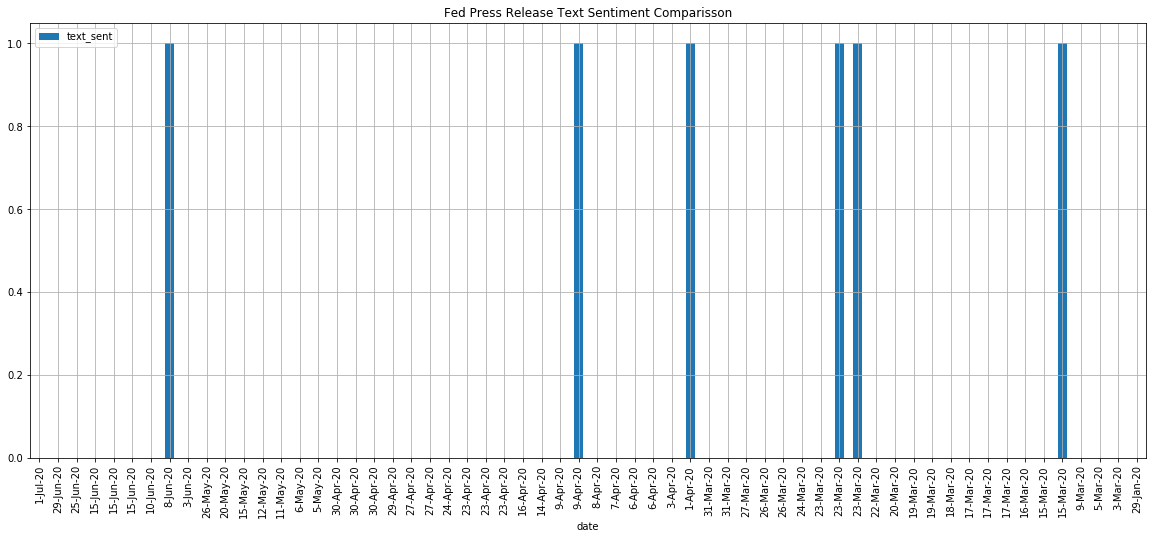

In [24]:
compound_df.plot(
    y=["text_sent"],
    kind="bar",
    title="Fed Press Release Text Sentiment Comparisson",
    figsize=(20, 8),
    grid=True,
)

In [25]:
fed_csv_num.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.00000,60.00000,60.000000,60.000000
mean,0.273065,0.125600,0.849600,0.024800,0.0,0.734025,0.11990,0.84575,0.034300,0.100000
std,0.331667,0.122015,0.131767,0.057485,0.0,0.469465,0.04793,0.05197,0.026028,0.302532
min,-0.421500,0.000000,0.565000,0.000000,0.0,-0.939800,0.02000,0.69400,0.000000,0.000000
25%,0.000000,0.000000,0.747500,0.000000,0.0,0.711500,0.08875,0.81550,0.016750,0.000000
50%,0.202300,0.122000,0.865000,0.000000,0.0,0.955750,0.11650,0.84600,0.027500,0.000000
75%,0.602650,0.214250,1.000000,0.000000,0.0,0.983625,0.15625,0.87400,0.049000,0.000000
max,0.844200,0.391000,1.000000,0.249000,0.0,0.999300,0.23400,0.97000,0.102000,1.000000


# Upload DF into .CSV file

In [26]:
# fed_csv_num.columns
compound_df = fed_csv_num.drop(columns = ['release', 'url', 'text', 'title_compound',
       'title_pos', 'title_neu', 'title_neg', 'title_sent',
       'text_pos', 'text_neu', 'text_neg'])